<a href="https://colab.research.google.com/github/s-manterola/Earthquake/blob/main/Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
from numpy import datetime64
import numpy as np
import math
import matplotlib.pyplot as plt

In [41]:
filename = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Earthquake/Base de datos/database.csv'

df = pd.read_csv(filename)

In [42]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [43]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Time       23412 non-null  object 
 2   Latitude   23412 non-null  float64
 3   Longitude  23412 non-null  float64
 4   Depth      23412 non-null  float64
 5   Magnitude  23412 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


In [45]:
while(True):
  try:
    pd.to_datetime(df['Date'], format='%m/%d/%Y')
  except ValueError as err:
    err = str(err)
    er = err[err.index("'")+1:err.index("'",err.index("'")+1)]

    corD = er[er.index('-')+1: er.index('-')+3] + "/" + er[er.index('-')+4: er.index('-')+6] + "/" + er[0:er.index('-')]
    corT = er[er.index('T')+1: er.index('Z')-4]

    df['Date'].replace(er, corD, inplace = True)
    df['Time'].replace(er, corT, inplace = True)
  else:
    break

df['DateTime'] = pd.to_datetime(df['Date'] + ','+ df['Time'],format='%m/%d/%Y,%H:%M:%S')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23412 non-null  object        
 1   Time       23412 non-null  object        
 2   Latitude   23412 non-null  float64       
 3   Longitude  23412 non-null  float64       
 4   Depth      23412 non-null  float64       
 5   Magnitude  23412 non-null  float64       
 6   DateTime   23412 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.3+ MB


In [47]:
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,DateTime
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,1965-01-09 13:32:50


In [48]:
#Parametros a definir:
# Tiempo: tiempo desde el sismo en que se buscaran mas sismos (en segundos)
# Distancia: Distancia desde el sismo en que se buscaran mas sismos (en kilometros)

# Por ahora se definiran Tiempo: 864000s (10 dias), Distancia: 250km

Tiempo = 864000
Distancia = 250

In [49]:
df['Replicas'] = 0

In [50]:
R = 6371 #Radio de la tierra en km

for i in range(df.shape[0]):
  for j in range(i+1,df.shape[0]):
    if(i==j):
      continue
    d = math.acos(math.sin(math.radians(df.iloc[i,2]))*math.sin(math.radians(df.iloc[j,2]))+
                  math.cos(math.radians(df.iloc[i,2]))*math.cos(math.radians(df.iloc[j,2]))*
                  math.cos(math.radians(df.iloc[i,3]-df.iloc[j,3])))*R

    dt = (df.iloc[j,6]-df.iloc[i,6]).total_seconds()
    #print(dt)
    if (dt > Tiempo):
      break
    elif (d <= Distancia):
      df.iloc[i,7] = 1
      break
  #print(f"Progreso: {i*10000/(df.shape[0]*100.0)}%")

In [51]:
df.describe()

,Latitude,Longitude,Depth,Magnitude,Replicas
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531,0.274774
std,30.113183,125.511959,122.651898,0.423066,0.446410
min,-77.080000,-179.997000,-1.100000,5.500000,0.000000
25%,-18.653000,-76.349750,14.522500,5.600000,0.000000
50%,-3.568500,103.982000,33.000000,5.700000,0.000000
75%,26.190750,145.026250,54.000000,6.000000,1.000000
max,86.005000,179.998000,700.000000,9.100000,1.000000


In [52]:
print(f"Porcentaje de Sismos con Replicas con magnitud sobre 5.5: {100*df[df['Replicas'] !=0]['Date'].count()/df.shape[0]}%")

Porcentaje de Sismos con Replicas con magnitud sobre 5.5: 27.477362036562447%


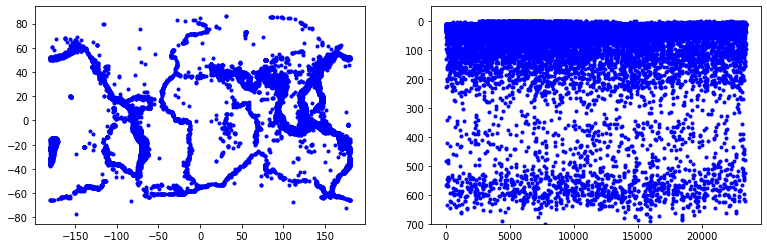

In [53]:
fig = plt.figure(figsize = (13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(df['Longitude'], df['Latitude'], "b.")

ax2 = fig.add_subplot(1,2,2)
ax2.plot(df['Depth'], "b.")

ax2.set_ylim(max(df['Depth']), min(df['Depth']-50))

plt.show()

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram') 

In [68]:
y = df['Replicas']
X = df.drop(['Replicas', 'Date', 'Time', 'DateTime'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Al imputar los datos, a estos ya se le habia separado la columna Outcome, que se 
# guardo en la variable 'y'. 

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Random Forest**

In [70]:
for i in range(50, 251, 50):
  rndf_clf = RandomForestClassifier(n_estimators=i, random_state = 42)

  rndf_pipeline = make_pipeline(scaler, rndf_clf)
  rndf_pipeline.fit(X_train, y_train)

  print(f"Score train Random Forest con {i} estimadores: {rndf_pipeline.score(X_train, y_train)*100}%")
  print(f"Score test Random Forest con {i} estimadores: {rndf_pipeline.score(X_test, y_test)*100}%")
  print("")

Score train Random Forest con 50 estimadores: 99.92524961289978%
Score test Random Forest con 50 estimadores: 75.29361520392911%

Score train Random Forest con 100 estimadores: 99.98398205990709%
Score test Random Forest con 100 estimadores: 75.33632286995515%

Score train Random Forest con 150 estimadores: 99.9946606866357%
Score test Random Forest con 150 estimadores: 75.10143070681188%

Score train Random Forest con 200 estimadores: 99.9946606866357%
Score test Random Forest con 200 estimadores: 75.16549220585095%

Score train Random Forest con 250 estimadores: 99.9946606866357%
Score test Random Forest con 250 estimadores: 75.42173820200726%



              precision    recall  f1-score   support

           0       0.80      0.88      0.84      3420
           1       0.56      0.41      0.47      1263

    accuracy                           0.75      4683
   macro avg       0.68      0.65      0.66      4683
weighted avg       0.74      0.75      0.74      4683



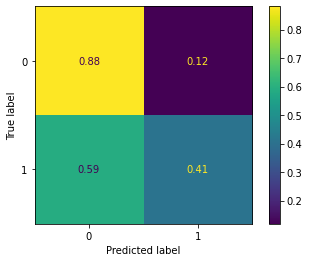

In [71]:
rndf_clf = RandomForestClassifier(n_estimators=250, random_state = 42)

rndf_pipeline = make_pipeline(scaler, rndf_clf)
rndf_pipeline.fit(X_train, y_train)

rndf_pre = rndf_pipeline.predict(X_test)
print(classification_report(y_test, rndf_pre))

cm = confusion_matrix(y_test, rndf_pre, labels=rndf_pipeline.classes_, normalize= 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rndf_pipeline.classes_)
disp.plot()
plt.show()

**Bagging Classifier**

In [72]:
for i in range(40, 121, 40):
  for j in range(50, 151, 50): 
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators = j,
        max_samples = i, bootstrap = True, #Si se quiere hacer pasting, esto es False
        random_state = 42)

    bag_pipeline = make_pipeline(scaler, bag_clf)
    bag_pipeline.fit(X_train, y_train)

    print(f"Score train Bagging Classifier con max_samples = {i} y n_estimators = {j}: {bag_pipeline.score(X_train, y_train)*100}%")
    print(f"Score test Bagging Classifier con max_samples = {i} y n_estimators = {j}: {bag_pipeline.score(X_test, y_test)*100}%")
    print("")

Score train Bagging Classifier con max_samples = 40 y n_estimators = 50: 73.63447060707993%
Score test Bagging Classifier con max_samples = 40 y n_estimators = 50: 74.58893871449925%

Score train Bagging Classifier con max_samples = 40 y n_estimators = 100: 73.8747397084735%
Score test Bagging Classifier con max_samples = 40 y n_estimators = 100: 74.63164638052531%

Score train Bagging Classifier con max_samples = 40 y n_estimators = 150: 73.82134657483049%
Score test Bagging Classifier con max_samples = 40 y n_estimators = 150: 74.48216954943412%

Score train Bagging Classifier con max_samples = 80 y n_estimators = 50: 74.07763361631694%
Score test Bagging Classifier con max_samples = 80 y n_estimators = 50: 74.26863121930386%

Score train Bagging Classifier con max_samples = 80 y n_estimators = 100: 74.40333173153932%
Score test Bagging Classifier con max_samples = 80 y n_estimators = 100: 75.29361520392911%

Score train Bagging Classifier con max_samples = 80 y n_estimators = 150: 7

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      3420
           1       0.65      0.19      0.29      1263

    accuracy                           0.75      4683
   macro avg       0.70      0.57      0.57      4683
weighted avg       0.73      0.75      0.70      4683



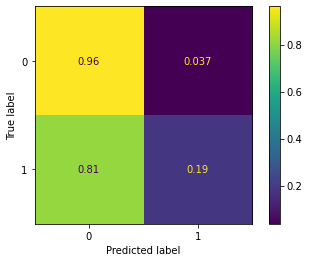

In [73]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators = 100,
        max_samples = 80, bootstrap = True, #Si se quiere hacer pasting, esto es False
        random_state = 42)

bag_pipeline = make_pipeline(scaler, bag_clf)
bag_pipeline.fit(X_train, y_train)

bag_pre = bag_pipeline.predict(X_test)
print(classification_report(y_test, bag_pre))

cm = confusion_matrix(y_test, bag_pre, labels=bag_pipeline.classes_, normalize= 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=bag_pipeline.classes_)
disp.plot()
plt.show()

**Logistic Regression**

Score train Logistic Regression: 73.56505953334401%
Score test Logistic Regression: 73.99103139013454%
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      3420
           1       0.66      0.07      0.13      1263

    accuracy                           0.74      4683
   macro avg       0.70      0.53      0.49      4683
weighted avg       0.72      0.74      0.65      4683



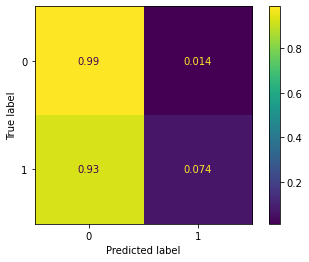

In [74]:
log_reg = LogisticRegression(solver='liblinear',
                            multi_class='ovr')

log_pipeline = make_pipeline(scaler, log_reg)
log_pipeline.fit(X_train, y_train)

print(f"Score train Logistic Regression: {log_pipeline.score(X_train, y_train)*100}%")
print(f"Score test Logistic Regression: {log_pipeline.score(X_test, y_test)*100}%")

log_pre = log_pipeline.predict(X_test)
print(classification_report(y_test, log_pre))

cm = confusion_matrix(y_test, log_pre, labels=log_pipeline.classes_, normalize= 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_pipeline.classes_)
disp.plot()
plt.show()

**Red Neuronal Sencilla**

In [88]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(df.drop(['Replicas', 'Date', 'Time', 'DateTime'], axis = 1)))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
import tensorflow as tf

In [91]:
# Armado de nuestra red neuronal
model = tf.keras.models.Sequential() # Modelo secuencial
model.add(tf.keras.layers.InputLayer(input_shape=(4,))) # Capa Input
model.add(tf.keras.layers.Dense(300, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(100, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(2, activation='softmax')) # Capa de salida, salida 10 (número de clases)


In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 300)               1500      
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 2)                 202       
                                                                 
Total params: 31,802
Trainable params: 31,802
Non-trainable params: 0
_________________________________________________________________


In [93]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                  stratify=y_train)

In [95]:
history = model.fit(X_train, y_train, epochs=30, batch_size=20000,
                    validation_data=(X_val, y_val))

Epoch 1/30
1/1 [==============================] - 1s 596ms/step - loss: 0.7506 - accuracy: 0.2960 - val_loss: 0.7452 - val_accuracy: 0.3153
Epoch 2/30
1/1 [==============================] - 0s 128ms/step - loss: 0.7454 - accuracy: 0.3145 - val_loss: 0.7401 - val_accuracy: 0.3393
Epoch 3/30
1/1 [==============================] - 0s 132ms/step - loss: 0.7403 - accuracy: 0.3339 - val_loss: 0.7351 - val_accuracy: 0.3553
Epoch 4/30
1/1 [==============================] - 0s 129ms/step - loss: 0.7354 - accuracy: 0.3497 - val_loss: 0.7304 - val_accuracy: 0.3729
Epoch 5/30
1/1 [==============================] - 0s 144ms/step - loss: 0.7307 - accuracy: 0.3696 - val_loss: 0.7258 - val_accuracy: 0.3983
Epoch 6/30
1/1 [==============================] - 0s 142ms/step - loss: 0.7261 - accuracy: 0.3882 - val_loss: 0.7213 - val_accuracy: 0.4068
Epoch 7/30
1/1 [==============================] - 0s 135ms/step - loss: 0.7217 - accuracy: 0.4021 - val_loss: 0.7171 - val_accuracy: 0.4167
Epoch 8/30
1/1 [====

In [96]:

score, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Score:", score) # Función de pérdida
print("Accuracy:", acc)

147/147 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.7203
Score: 0.6491472721099854
Accuracy: 0.7202647924423218


In [105]:
pro_pre = model.predict(X_test) 
pre=np.argmax(pro_pre ,axis=1)

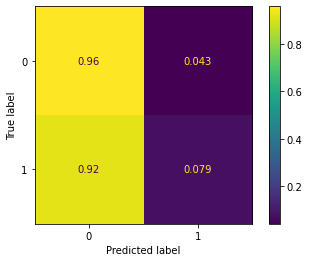

In [103]:
cm = confusion_matrix(y_test, pre, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Resumen**

Tanto la red neuronal como logistical regression predicen extremadamente pocas veces que va a ocurrir un sismo despues de que ocurrio otro. Ambos entregan una probabilidad de que ocurra. Bagging Classifiers predice correctamente 20% de los casos en que hay un sismo dentro de los rangos de otro sismo. Por otra parte, Random Forest logra acertar en 40% de los casos. 